In [ ]:
import numpy as np
import pandas as pd
import os
pd.set_option('display.max_rows', 1000)
rootdir = 'watch_acc'
#directory = 'watch_acc/0A986513-7828-4D53-AA1F-E02D6DF9561B'
df = []

for root, dirs, files in os.walk(rootdir):
    for dir_name in dirs:
        for file in os.listdir(os.path.join(root, dir_name)):
            data = pd.DataFrame(pd.read_csv(os.path.join(root, dir_name, file), delimiter = ' ', names = ['milliseconds', 'acc_x', 'acc_y', 'acc_z']))
            base = os.path.basename(file)
            tstamp = np.int(base[:base.index('.')])
            data.insert(0, 'timestamp', tstamp)
            df.append(data)
        user_data = pd.concat(df)
#         print(user_data)

In [54]:
table = pd.read_csv('watch_acc/00EABED2-271D-49D8-B599-1D4A09240601/1444079161.m_watch_acc.dat', delimiter = ' ', names = ['milliseconds', 'acc_x', 'acc_y', 'acc_z'])
table[['milliseconds']] = table[['milliseconds']]/1000 + 1444079161

In [77]:
data = pd.DataFrame(pd.read_csv('watch_acc/in_progress/1449601717.m_watch_acc.dat', delimiter = ' ', names = ['milliseconds', 'acc_x', 'acc_y', 'acc_z']))
base = os.path.basename('watch_acc/in_progress/1449601717.m_watch_acc.dat') 
tstamp = int(base[:base.index('.')]) #finds index of first '.' and extracts everything before it (timestamp)
data.insert(0, 'timestamp', tstamp)

In [ ]:
user_data = pd.concat(df)
#print(user_data)
new_data = user_data.sort_values(by=['timestamp', 'milliseconds'])
print(user_data)

In [4]:
import numpy as np
import pandas as pd
import os, re
pd.set_option('display.max_rows', 1000)
df1 = []
df2 = []
acc_data = []
gyro_data = []
acc_dir = 'test_phone_acc'
gyro_dir = 'test_phone_gyro'

for file in os.listdir(acc_dir):
    data = pd.DataFrame(pd.read_csv(os.path.join(acc_dir, file), delimiter = ' ', names = ['milliseconds', 'acc_x', 'acc_y', 'acc_z']))
    data['milliseconds'] = data['milliseconds'].apply(lambda x: x - 440000)
    base = os.path.basename(file)
    if re.search("\d", base) == None: # maybe change to .dat
        continue
    tstamp = np.int(base[:base.index('.')]) #finds index of first '.' and extracts everything before it (timestamp)
    data.insert(0, 'timestamp', tstamp)
    data['milliseconds'] = data['milliseconds'].apply(lambda x: x + int(tstamp) * 100)
    df1.append(data)
acc_data = pd.concat(df1)

for file in os.listdir(gyro_dir):
    data = pd.DataFrame(pd.read_csv(os.path.join(gyro_dir, file), delimiter = ' ', names = ['milliseconds', 'gyro_x', 'gyro_y', 'gyro_z']))
    data['milliseconds'] = data['milliseconds'].apply(lambda x: x - 440000)
    base = os.path.basename(file)
    if re.search("\d", base) == None: # maybe change to .dat
        continue
    tstamp = np.int(base[:base.index('.')]) #finds index of first '.' and extracts everything before it (timestamp)
    data.insert(0, 'timestamp', tstamp)
    data['milliseconds'] = data['milliseconds'].apply(lambda x: x + int(tstamp) * 100)
    df2.append(data)
gyro_data = pd.concat(df2)

data = pd.merge(acc_data, gyro_data, on = ['timestamp', 'milliseconds'], how = 'outer')
print(data.head())

    timestamp  milliseconds     acc_x     acc_y     acc_z  gyro_x  gyro_y  \
0  1449601855  1.449602e+11  0.014877  0.009903 -0.985733     NaN     NaN   
1  1449601855  1.449602e+11 -0.004425  0.000397 -1.007645     NaN     NaN   
2  1449601855  1.449602e+11  0.007492 -0.002777 -1.001984     NaN     NaN   
3  1449601855  1.449602e+11  0.011185 -0.000610 -0.997498     NaN     NaN   
4  1449601855  1.449602e+11  0.002335  0.004868 -1.000549     NaN     NaN   

   gyro_z  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 648x216 with 0 Axes>

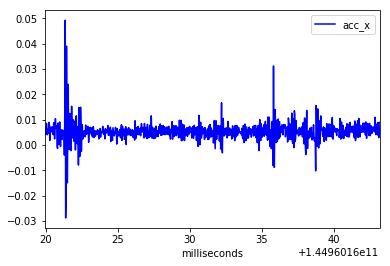

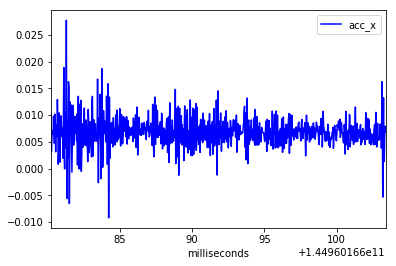

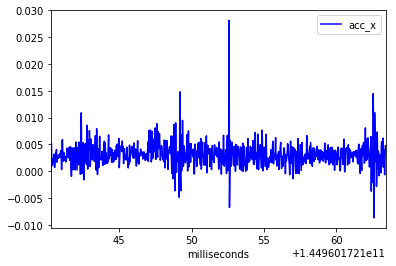

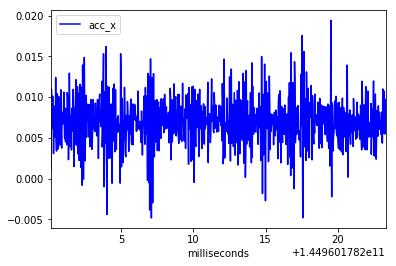

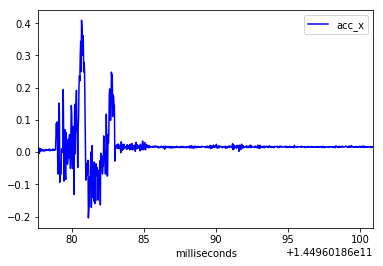

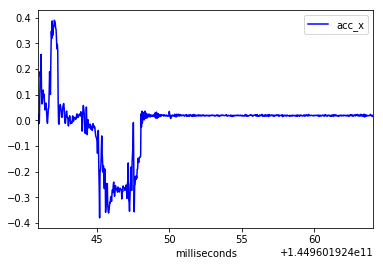

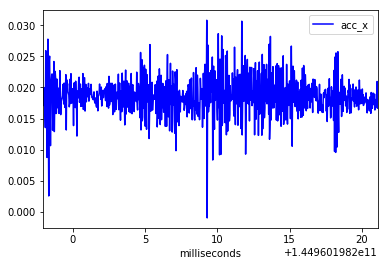

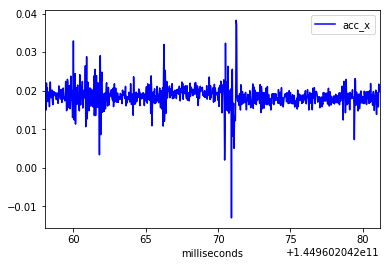

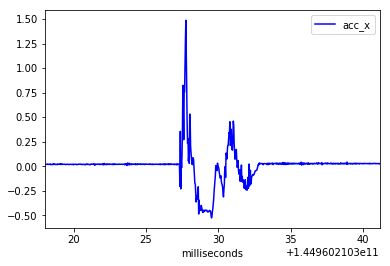

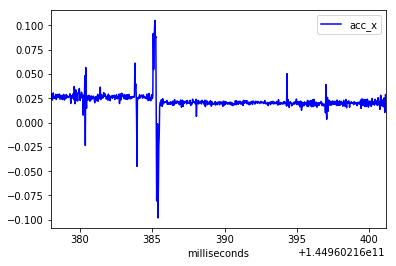

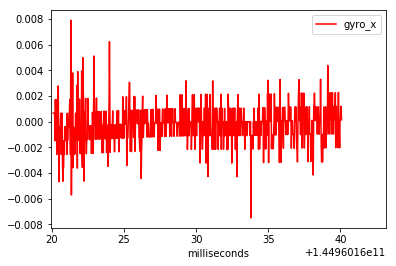

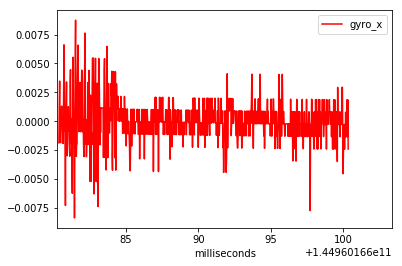

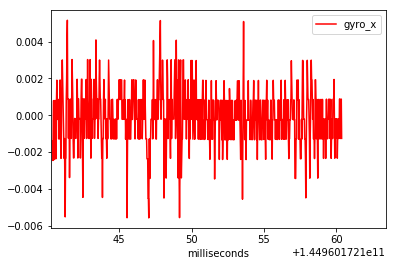

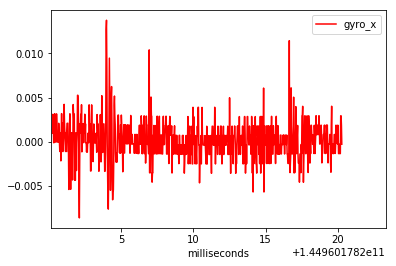

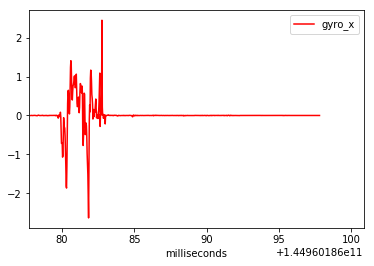

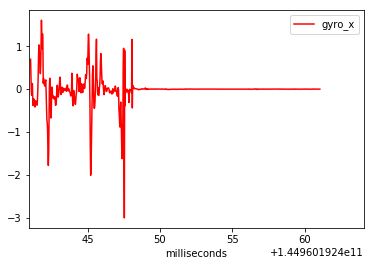

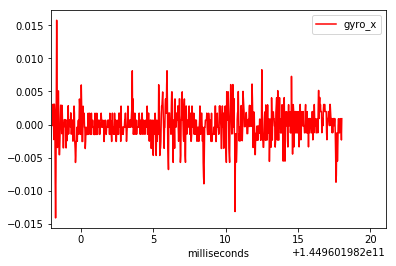

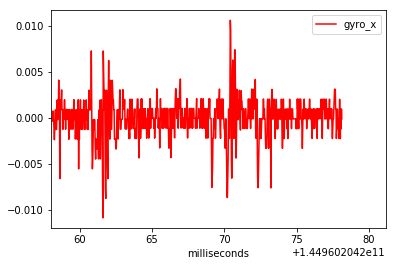

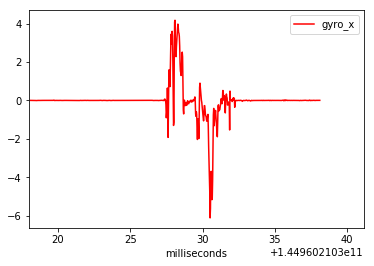

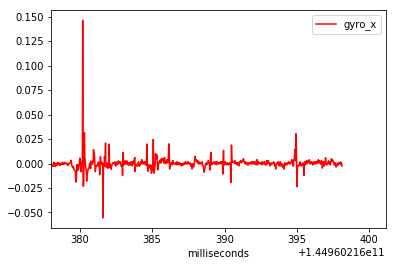

In [27]:
plt.figure(figsize = (9,3))
data.groupby('timestamp').plot(kind = 'line', x = 'milliseconds', y = 'acc_x', color = 'blue')
data.groupby('timestamp').plot(kind = 'line', x = 'milliseconds', y = 'gyro_x', color = 'red')
plt.show()